# Module Import

In [1]:
import numpy as np
import time 
import math
import sys
import timeit
import matplotlib.pyplot as plt
import pylab as pyl
import csv

# Insertion Sort

In [2]:
#implementation of insertion sort algorithm
def insertion_sort(unsorted_is):
    for j in range(1, unsorted_is.shape[0]):
        key = unsorted_is[j]
        i = j-1
        while i>-1 and unsorted_is[i]>=key:
            unsorted_is[i+1] = unsorted_is[i]
            i-=1
            
        unsorted_is[i+1] = key
    
    return unsorted_is

# Selection Sort

In [3]:
#implementation of selection sort algorithm
def selection_sort(unsorted_ss):
    for i in range(unsorted_ss.shape[0] - 1):
        lowindex = i #unsorted_ss_min = unsorted_ss[i]
        for j in reversed(range(i + 1, unsorted_ss.shape[0])):
            if unsorted_ss[j]<unsorted_ss[lowindex]:
                lowindex=j #unsorted_ss[i] = unsorted_ss[j]
                #unsorted_ss[j] = unsorted_ss_min
        unsorted_ss[i], unsorted_ss[lowindex] = unsorted_ss[lowindex], unsorted_ss[i]
    
        
    return unsorted_ss

# Merge Sort

In [4]:
###implementation of merge sort algorithm

#definition of merge function
def merge(left_sub_array, right_sub_array):
    merged_array = np.zeros(left_sub_array.shape[0] + right_sub_array.shape[0])
    
    left_index = 0
    right_index = 0
    
    for i in range(merged_array.shape[0]):
        if left_sub_array[left_index] <= right_sub_array[right_index] :
            merged_array[i] = left_sub_array[left_index]
            if not (left_index + 1) >= left_sub_array.shape[0]:
                left_index +=1
            else:
                left_sub_array[left_index] = sys.maxsize #sys.maxsize used as ininfity integer number
        else :
            merged_array[i] = right_sub_array[right_index]
            if not (right_index + 1) >= right_sub_array.shape[0]:
                right_index +=1
            else:
                right_sub_array[right_index] = sys.maxsize
            
    #merged_array = np.concatenate((left_sub_array, right_sub_array), axis=0)
    #left_index = 0
    #right_index = left_sub_array.shape[0]
    
    #for i in range(merged_array.shape[0]):
    #    if merged_array[left_index] <= merged_array[right_index] :
    #        merged_array[left_index], merged_array[right_index] = merged_array[right_index], merged_array[left_index]
    #        left_index +=1
    #    else :
    #        merged_array[right_index], merged_array[left_index] = merged_array[left_index], merged_array[right_index]
    #        if not (right_index + 1) >= merged_array.shape[0]:
    #            right_index +=1
            
    
    return merged_array

#definition of merge_sort function
def merge_sort(unsorted_ms):
    if unsorted_ms.shape[0] == 1 :
        return unsorted_ms
    else :
        L_sub_array, R_sub_array = np.array_split(ary=unsorted_ms, indices_or_sections=2)
        
        L_sub_array = merge_sort(L_sub_array)
        R_sub_array = merge_sort(R_sub_array)
        
        return merge(L_sub_array, R_sub_array)

# Quick Sort

In [5]:
### implementation of quick sort algorithm

#definition of partition function
def partition (unpartitioned):
    unpartitioned_size = unpartitioned.shape[0]
    
    pivot = unpartitioned[unpartitioned_size - 1]
    min_index = -1
    
    for i in range(unpartitioned_size-1):
        if unpartitioned[i] <= pivot :
            min_index += 1
            unpartitioned[min_index], unpartitioned[i] = unpartitioned[i], unpartitioned[min_index]
            
    unpartitioned[min_index + 1], unpartitioned[unpartitioned_size - 1] = unpartitioned[unpartitioned_size - 1], unpartitioned[min_index + 1]
    
    return min_index + 1 , unpartitioned

def quick_sort(unsorted_qs):
    if unsorted_qs.shape[0] <= 1 :
        return unsorted_qs
    else:
        partition_index, unsorted_qs = partition(unsorted_qs)
        left_qs = unsorted_qs[:partition_index]
        pivot_qs = np.array((1,))
        pivot_qs[0] = unsorted_qs[partition_index]
        right_qs = unsorted_qs[partition_index + 1 :]
        
        left_qs = quick_sort(left_qs)
        right_qs = quick_sort(right_qs)
        
        return np.concatenate((left_qs, pivot_qs, right_qs))
        

# Heap Sort

In [6]:
### implementation of heap sort algorithm

#definition of max_heapify function
def max_heapify (non_heap_array, heap_start_index):
    largest = heap_start_index
    heap_size = non_heap_array.shape[0] - 1
    #if left_child_index > (non_heap_array.shape[0] - 1)
    left_child_index = 2*heap_start_index + 1
    right_child_index = left_child_index + 1
    
    heap_size = non_heap_array.shape[0]
    
    if left_child_index < heap_size and non_heap_array[left_child_index] > non_heap_array[heap_start_index] :
        largest = left_child_index
    else :
        largest = heap_start_index
    
    if right_child_index < heap_size and non_heap_array[right_child_index] > non_heap_array[largest] :
        largest = right_child_index
    
    if not (largest == heap_start_index) :
        non_heap_array[heap_start_index], non_heap_array[largest] = non_heap_array[largest], non_heap_array[heap_start_index]
        non_heap_array = max_heapify(non_heap_array, largest)
        
    return non_heap_array

#definition of build_max_heap function
def build_max_heap (non_max_heap) :
    for i in reversed(range(math.floor((non_max_heap.shape[0] - 1)/2))) :
        non_max_heap = max_heapify(non_max_heap, i)
        
    return non_max_heap

#definition of heap_sort function
def heap_sort(unsorted_hs) :
    unsorted_hs = build_max_heap(unsorted_hs)
    
    for i in reversed(range(1,unsorted_hs.shape[0])) :
        unsorted_hs[0], unsorted_hs[i] = unsorted_hs[i], unsorted_hs[0]
        temp_array = unsorted_hs[:i] #simulating heap_size - 1 of unsorted_hs
        unsorted_hs = np.concatenate((max_heapify(temp_array, 0), unsorted_hs[i:]), axis=0)
        
    return unsorted_hs

# Tests

def main ():
    ##prepare array to be sorted
    test_array = np.random.randint(0,2000000, 20) #random 100000 numbers in the range 0 - 2000000
    test_array_reverse = np.arange(2000000,-20,-20) # reversly ordered array
    test_array_ordered = np.arange(0, 2000000,20) # reversly ordered array
    
    ##call each algorithm with the array above
    print(test_array)
    result = insertion_sort(test_array)
    print(result)
    ##draw graph and time

main()

In [7]:
##prepare intervals size
start = 0
stop = 2000
step = 20
range_step = int(stop/step)

intervals_array = np.empty((0,1), dtype=int)
for i in range(start, stop+1, range_step):
    intervals_array = np.append(intervals_array, int(i))

print(np.arange(50, -1, -1))

In [8]:
#generate arrays for each interval size


#dictionary of arrays with presortedness=0 for each interval
dict0 = {0:np.array([1])}
j = 1
for i in intervals_array[1:]:
    dict0[j] = np.arange(i, -1, -1) #np.flip(np.sort(np.random.randint(0, high=i, size=i)), axis=0)
    j += 1
    
#(number of algorithms X number of intervals) array holding the runtime of each algorithm(row)
#for sorting each interval's(column) array with presortedness=0
rt0 = np.zeros((5,21))
dict0_Isorted={}
dict0_Ssorted={}
dict0_Msorted={}
dict0_Qsorted={}
dict0_Hsorted={}


###testing insertion sort
for intervals in range(len(dict0)):
    #if sorter=="insertion_sort":
    start_time = time.time()
    dict0_Isorted[intervals] = insertion_sort(dict0[intervals])
    end_time = time.time()
    rt0[0][intervals] = end_time - start_time
    
###testing selection sort
for intervals in range(len(dict0)):
    start_time = time.time()
    dict0_Ssorted[intervals] = selection_sort(dict0[intervals])
    end_time = time.time()
    rt0[1][intervals] = end_time - start_time    
    
###testing merge sort
for intervals in range(len(dict0)):
    start_time = time.time()
    dict0_Msorted[intervals] = merge_sort(dict0[intervals])
    end_time = time.time()
    rt0[2][intervals] = end_time - start_time
    
###testing quick sort
for intervals in range(len(dict0)):
    start_time = time.time()
    dict0_Qsorted[intervals] = quick_sort(dict0[intervals])
    end_time = time.time()
    rt0[3][intervals] = end_time - start_time
    
###testing heap sort
for intervals in range(len(dict0)):
    start_time = time.time()
    dict0_Hsorted[intervals] = heap_sort(dict0[intervals])
    end_time = time.time()
    rt0[4][intervals] = end_time - start_time

#dictionary of arrays with presortedness=0.5 for each interval
dict0_5 = {0:np.array([1])}
j = 1
for i in intervals_array[1:]:
    dict0[j] = np.random.randint(start, high=i, size=i)
    j += 1
    
#(number of algorithms X number of intervals) array holding the runtime of each algorithm(row)
#for sorting each interval's(column) array with presortedness=0.5
rt0_5 = np.zeros((5,21))
dict0_5_Isorted={}
dict0_5_Ssorted={}
dict0_5_Msorted={}
dict0_5_Qsorted={}
dict0_5_Hsorted={}

for reptition in range(rep):
###testing insertion sort
for intervals in range(len(dict0_5)):
    start_time = time.time()
    dict0_5_Isorted[intervals] = insertion_sort(dict0_5[intervals])
    end_time = time.time()
    rt0_5[0][intervals] = (rt0_5[0][intervals] + end_time - start_time)/2 #averaging
    
###testing selection sort
for intervals in range(len(dict0_5)):
    start_time = time.time()
    dict0_5_Ssorted[intervals] = selection_sort(dict0_5[intervals])
    end_time = time.time()
    rt0_5[1][intervals] = (rt0_5[1][intervals] + end_time - start_time)/2 
    
###testing merge sort
for intervals in range(len(dict0_5)):
    start_time = time.time()
    dict0_5_Msorted[intervals] = merge_sort(dict0_5[intervals])
    end_time = time.time()
    rt0_5[2][intervals] = ( rt0_5[2][intervals] + end_time - start_time)/2
    
###testing quick sort
for intervals in range(len(dict0_5)):
    start_time = time.time()
    dict0_5_Qsorted[intervals] = quick_sort(dict0_5[intervals])
    end_time = time.time()
    rt0_5[3][intervals] = (rt0_5[3][intervals] + end_time - start_time)/2
    
###testing heap sort
for intervals in range(len(dict0_5)):
    start_time = time.time()
    dict0_5_Hsorted[intervals] = heap_sort(dict0_5[intervals])
    end_time = time.time()
    rt0_5[4][intervals] = ( rt0_5[4][intervals] + end_time - start_time)/2


#dictionary of arrays with presortedness=1 for each interval
dict1 = {0:np.array([1])}
j = 1
for i in intervals_array[1:]:
    dict0[j] = np.arange(0, i, 1) #np.sort(np.random.randint(0, high=i, size=i))
    j += 1
    
#(number of algorithms X number of intervals) array holding the runtime of each algorithm(row)
#for sorting each interval's(column) array with presortedness=1
rt1 = np.zeros((5,21))
dict1_Isorted={}
dict1_Ssorted={}
dict1_Msorted={}
dict1_Qsorted={}
dict1_Hsorted={}


###testing insertion sort
for intervals in range(len(dict1)):
    start_time = time.time()
    dict1_Isorted[intervals] = insertion_sort(dict1[intervals])
    end_time = time.time()
    rt1[0][intervals] = end_time - start_time
    
###testing selection sort
for intervals in range(len(dict1)):
    start_time = time.time()
    dict1_Ssorted[intervals] = selection_sort(dict1[intervals])
    end_time = time.time()
    rt1[1][intervals] = end_time - start_time    
    
###testing merge sort
for intervals in range(len(dict1)):
    start_time = time.time()
    dict1_Msorted[intervals] = merge_sort(dict1[intervals])
    end_time = time.time()
    rt1[2][intervals] = end_time - start_time
    
###testing quick sort
for intervals in range(len(dict1)):
    start_time = time.time()
    dict1_Qsorted[intervals] = quick_sort(dict1[intervals])
    end_time = time.time()
    rt1[3][intervals] = end_time - start_time
    
###testing heap sort
for intervals in range(len(dict1)):
    start_time = time.time()
    dict1_Hsorted[intervals] = heap_sort(dict1[intervals])
    end_time = time.time()
    rt1[4][intervals] = end_time - start_time

IndentationError: expected an indented block (<ipython-input-8-b506bbde0bcc>, line 75)

print(dict0)

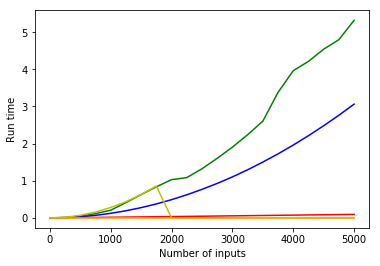

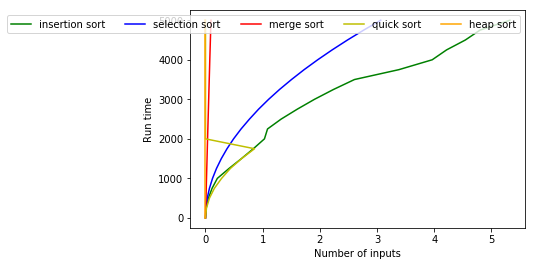

In [53]:
#graph for presortedness=0
a = [1,2,3]
b = [4,5,6]
c = [7,8,9]
plt.plot( intervals_array, rt0[0][:], color='g')  #insertion sort
plt.plot( intervals_array, rt0[1][:], color='b')  #selection sort
plt.plot( intervals_array, rt0[2][:], color='r')  #merge sort
plt.plot( intervals_array, rt0[3][:], color='y')  #quick sort
plt.plot( intervals_array, rt0[4][:], color='orange')   #heap sort
plt.ylabel("Run time")
plt.xlabel("Number of inputs")
plt.show()

pyl.plot( rt0[0][:], intervals_array, color='g', label='insertion sort')  #insertion sort
pyl.plot( rt0[1][:], intervals_array, color='b', label='selection sort')  #selection sort
pyl.plot( rt0[2][:], intervals_array, color='r', label='merge sort')  #merge sort
pyl.plot( rt0[3][:], intervals_array, color='y', label='quick sort')  #quick sort
pyl.plot( rt0[4][:], intervals_array, color='orange', label='heap sort')   #heap sort
pyl.legend( loc=1, ncol=5)
pyl.ylabel("Run time")
pyl.xlabel("Number of inputs")
pyl.show()


for i in range(len(dict0)):
    #print (i)

dict0 = {0:np.array([1])}
j = 1
for i in interval_array[1:]:
    dict0[j] = np.flip(np.sort(np.random.randint(0, high=i, size=i)), axis=0)
    j += 1
print(dict0)
print(len(dict0))

dict0_sorted={}
rt0 = np.zeros((5,21))
#for sorter in sorter_alg:
for intervals in range(len(dict0)):
    #if sorter=="insertion_sort":
    start_time = time.time()
    dict0_sorted[intervals] = insertion_sort(dict0[intervals])
    end_time = time.time()
    rt0[0][intervals] = end_time - start_time
    
print(dict0)
print(dict0_sorted)
print(rt0[0][:])
print(len(rt0[0][:]))